**Intializing the Coding** **by** **Loading** **important libraries** **bold text** **bold text**

In [2]:
import numpy as np
# for dataframe manipulations
import pandas as pd
# for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns
# for missing values
import missingno as mno
# for date time manipulation
import datetime
# for interactivity
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual
# setting up the background style for the plots
plt.style.use('fivethirtyeight')

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



### **Load the dataset into python environment**

In [6]:
#read the data
data=pd.read_csv('/content/drive/MyDrive/train.csv')

## **Data Analysis**

In [7]:
#check the data
data

,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,PLID_4964,Keva Horan,23,M,Ukraine,6'2,176lbs,77.0,58.0,47.0,...,Right,7.7,NaN,8.1,2.0,High,Talent Hunt,8.0,0.0,1
1,PLID_11234,Herma Tann,18,M,Russia,5'10,148lbs,54.0,69.0,70.0,...,Any,5.3,0.0,NaN,3.0,Medium,Source,3.0,0.0,0
2,PLID_19127,Eilene Kizer,16,F,Spain,6'2,172lbs,34.0,43.0,45.0,...,Left,4.7,0.0,6.6,5.0,Low,Academy,2.0,0.0,1
3,PLID_17467,Andrea Badgett,27,M,Chile,5'11,165lbs,79.0,73.0,76.0,...,Right,8.6,113.0,8.6,6.0,Medium,Academy,13.0,16.0,1
4,PLID_9661,Jeremiah Bumbalough,19,F,Argentina,5'8,158lbs,47.0,61.0,74.0,...,Right,NaN,0.0,5.7,5.0,Medium,Academy,4.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13989,PLID_10956,Viva Stepney,20,M,Uruguay,6'0,161lbs,60.0,48.0,62.0,...,Right,6.0,NaN,7.6,2.0,Medium,Academy,6.0,0.0,1
13990,PLID_17290,Illa Pitre,18,F,England,5'10,165lbs,53.0,68.0,59.0,...,Right,5.3,0.0,5.6,3.0,Medium,Academy,4.0,0.0,0
13991,PLID_5193,Marylouise Mosley,17,M,Japan,6'0,172lbs,56.0,73.0,62.0,...,Left,5.7,0.0,7.7,3.0,Low,Talent Hunt,2.0,0.0,1
13992,PLID_12173,Teri Escamilla,20,F,Ukraine,5'10,150lbs,71.0,69.0,70.0,...,Left,6.8,1.0,5.8,4.0,Medium,Academy,6.0,0.0,1


In [8]:

# lets also check the shape of the dataset
print(data.shape)

(13994, 30)


In [9]:
data.head()

,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,PLID_4964,Keva Horan,23,M,Ukraine,6'2,176lbs,77.0,58.0,47.0,...,Right,7.7,NaN,8.1,2.0,High,Talent Hunt,8.0,0.0,1
1,PLID_11234,Herma Tann,18,M,Russia,5'10,148lbs,54.0,69.0,70.0,...,Any,5.3,0.0,NaN,3.0,Medium,Source,3.0,0.0,0
2,PLID_19127,Eilene Kizer,16,F,Spain,6'2,172lbs,34.0,43.0,45.0,...,Left,4.7,0.0,6.6,5.0,Low,Academy,2.0,0.0,1
3,PLID_17467,Andrea Badgett,27,M,Chile,5'11,165lbs,79.0,73.0,76.0,...,Right,8.6,113.0,8.6,6.0,Medium,Academy,13.0,16.0,1
4,PLID_9661,Jeremiah Bumbalough,19,F,Argentina,5'8,158lbs,47.0,61.0,74.0,...,Right,NaN,0.0,5.7,5.0,Medium,Academy,4.0,0.0,0


In [12]:
#checking the datatypes of each features
data.dtypes

player_id                     object
name                          object
age                            int64
gender                        object
country                       object
height                        object
weight                        object
ball_controlling_skills      float64
body_reflexes                float64
body_balance                 float64
jumping_skills               float64
penalties_conversion_rate    float64
mental_strength              float64
goalkeeping_skills           float64
defending_skills             float64
passing_skills               float64
dribbling_skills             float64
shot_accuracy                float64
body_strength_stamina        float64
max_running_speed            float64
strong_foot                   object
behaviour_rating             float64
matches_played               float64
fitness_rating               float64
trophies_won                 float64
dedication_level              object
coaching                      object
y

In [13]:
#information about the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13994 entries, 0 to 13993
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   player_id                  13994 non-null  object 
 1   name                       13994 non-null  object 
 2   age                        13994 non-null  int64  
 3   gender                     13975 non-null  object 
 4   country                    13994 non-null  object 
 5   height                     13994 non-null  object 
 6   weight                     13577 non-null  object 
 7   ball_controlling_skills    13581 non-null  float64
 8   body_reflexes              13994 non-null  float64
 9   body_balance               13994 non-null  float64
 10  jumping_skills             13970 non-null  float64
 11  penalties_conversion_rate  13964 non-null  float64
 12  mental_strength            13966 non-null  float64
 13  goalkeeping_skills         13994 non-null  flo

In [14]:
#Checking  statistical summary
data.describe()

,age,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,mental_strength,goalkeeping_skills,defending_skills,passing_skills,...,shot_accuracy,body_strength_stamina,max_running_speed,behaviour_rating,matches_played,fitness_rating,trophies_won,years_of_experience,no_of_disqualifications,selection
count,13994.000000,13581.000000,13994.000000,13994.000000,13970.000000,13964.000000,13966.000000,13994.000000,13994.000000,13994.000000,...,13422.000000,13994.000000,13994.000000,13291.000000,13328.000000,13299.000000,13994.000000,13850.000000,13994.000000,13994.000000
mean,21.135844,56.043958,61.934329,62.753323,63.612026,48.495703,56.768366,16.474632,48.108118,52.935973,...,47.178140,62.652780,23.586094,5.822068,3.908463,6.405482,3.389095,6.434152,-4.740675,0.557525
std,5.162719,16.787353,14.931963,14.203638,11.938712,15.767506,11.977744,16.874551,16.821929,14.201782,...,15.803991,11.512526,5.194387,1.095702,13.583229,1.706983,1.709152,4.450954,72.023656,0.496698
min,16.000000,5.000000,12.000000,9.000000,14.000000,7.000000,9.000000,1.000000,9.000000,13.000000,...,7.000000,15.000000,5.400000,2.100000,0.000000,1.000000,0.000000,1.000000,-999.000000,0.000000
25%,17.000000,51.000000,54.000000,55.000000,57.000000,39.000000,49.000000,10.000000,36.000000,45.000000,...,38.000000,56.000000,21.100000,5.100000,0.000000,5.600000,2.000000,2.000000,0.000000,0.000000
50%,20.000000,61.000000,64.000000,65.000000,64.000000,49.000000,58.000000,11.000000,52.000000,56.000000,...,50.000000,64.000000,24.600000,5.900000,0.000000,6.800000,3.000000,6.000000,0.000000,1.000000
75%,24.000000,67.000000,72.000000,73.000000,72.000000,60.000000,65.000000,12.000000,61.000000,63.000000,...,59.000000,71.000000,27.100000,6.500000,1.000000,7.500000,5.000000,10.000000,0.000000,1.000000
max,61.000000,95.000000,96.000000,97.000000,95.000000,92.000000,92.000000,88.000000,86.000000,89.000000,...,86.000000,92.000000,35.000000,9.800000,151.000000,10.000000,9.000000,26.000000,25.000000,1.000000


In [15]:
data.describe(include=object)

,player_id,name,gender,country,height,weight,strong_foot,dedication_level,coaching
count,13994,13994,13975,13994,13994,13577,13442,13994,13869
unique,13994,13994,2,163,31,88,4,3,4
top,PLID_4964,Keva Horan,M,England,6'0,165lbs,Right,Medium,Academy
freq,1,1,6992,1157,2251,1106,8359,9704,9390


In [10]:
data.columns

Index(['player_id', 'name', 'age', 'gender', 'country', 'height', 'weight',
       'ball_controlling_skills', 'body_reflexes', 'body_balance',
       'jumping_skills', 'penalties_conversion_rate', 'mental_strength',
       'goalkeeping_skills', 'defending_skills', 'passing_skills',
       'dribbling_skills', 'shot_accuracy', 'body_strength_stamina',
       'max_running_speed', 'strong_foot', 'behaviour_rating',
       'matches_played', 'fitness_rating', 'trophies_won', 'dedication_level',
       'coaching', 'years_of_experience', 'no_of_disqualifications',
       'selection'],
      dtype='object')

In [17]:
# Checking the missing values
data.isnull().sum()

player_id                      0
name                           0
age                            0
gender                        19
country                        0
height                         0
weight                       417
ball_controlling_skills      413
body_reflexes                  0
body_balance                   0
jumping_skills                24
penalties_conversion_rate     30
mental_strength               28
goalkeeping_skills             0
defending_skills               0
passing_skills                 0
dribbling_skills               0
shot_accuracy                572
body_strength_stamina          0
max_running_speed              0
strong_foot                  552
behaviour_rating             703
matches_played               666
fitness_rating               695
trophies_won                   0
dedication_level               0
coaching                     125
years_of_experience          144
no_of_disqualifications        0
selection                      0
dtype: int

In [18]:
data.selection.value_counts() #target variable has discrete numerical values either 0 or 1-So it is a classification problem

1    7802
0    6192
Name: selection, dtype: int64

In [33]:
data.duplicated().sum() #no duplicate values

0

In [36]:
#Calculating the those who got selection verses those who did not getselected in the dataset and plotting it
select = data[data['selection'] == 1]
Noselect = data[data['selection'] == 0]
s=[len(select)/len(data)*100.0,len(Noselect)/len(data)*100.0]
print('Percentage of those who got selected verses not selected is',s)

Percentage of those who got selected verses not selected is [55.75246534228955, 44.247534657710446]


In [23]:
#Null values percentage in overall data
data.isnull().sum()/data.shape[0]*100

player_id                    0.000000
name                         0.000000
age                          0.000000
gender                       0.135772
country                      0.000000
height                       0.000000
weight                       2.979849
ball_controlling_skills      2.951265
body_reflexes                0.000000
body_balance                 0.000000
jumping_skills               0.171502
penalties_conversion_rate    0.214378
mental_strength              0.200086
goalkeeping_skills           0.000000
defending_skills             0.000000
passing_skills               0.000000
dribbling_skills             0.000000
shot_accuracy                4.087466
body_strength_stamina        0.000000
max_running_speed            0.000000
strong_foot                  3.944548
behaviour_rating             5.023582
matches_played               4.759183
fitness_rating               4.966414
trophies_won                 0.000000
dedication_level             0.000000
coaching    

DA Observations:- The above dataset is related to soccer/football players peroformance related dataset.Our target is seletion and we need to build a best performing model to predict whether a player will get selected or not based on the features.

### **EDA**

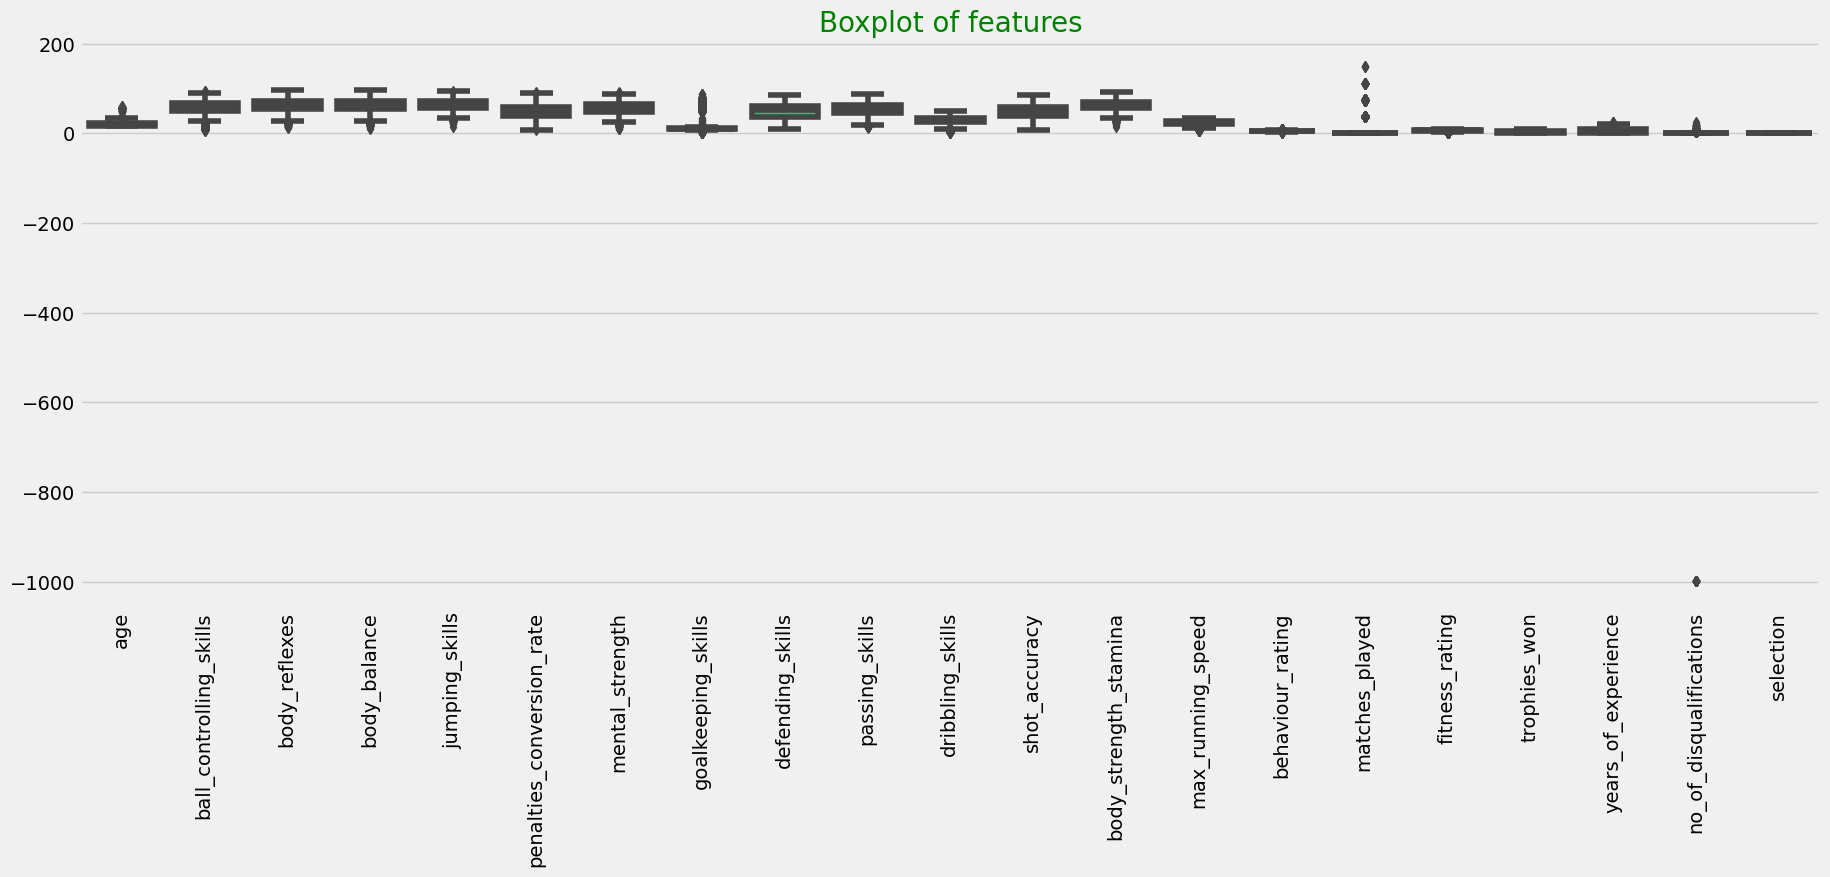

In [28]:
plt.figure(figsize=(20,7))
plt.title('Boxplot of features',size=20,color='Green')
plt.xticks(rotation=90)
sns.boxplot(data=data)
plt.show()

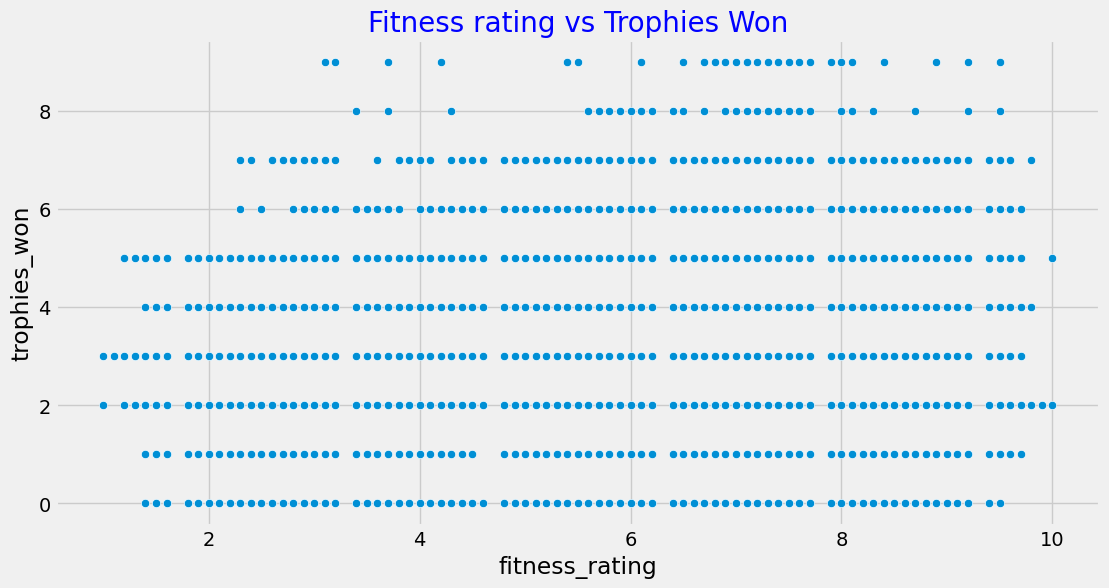

In [37]:
plt.figure(figsize=(12,6))
plt.title('Fitness rating vs Trophies Won',size=20,color='blue')
sns.scatterplot(x='fitness_rating',y='trophies_won',data=data)
plt.show()

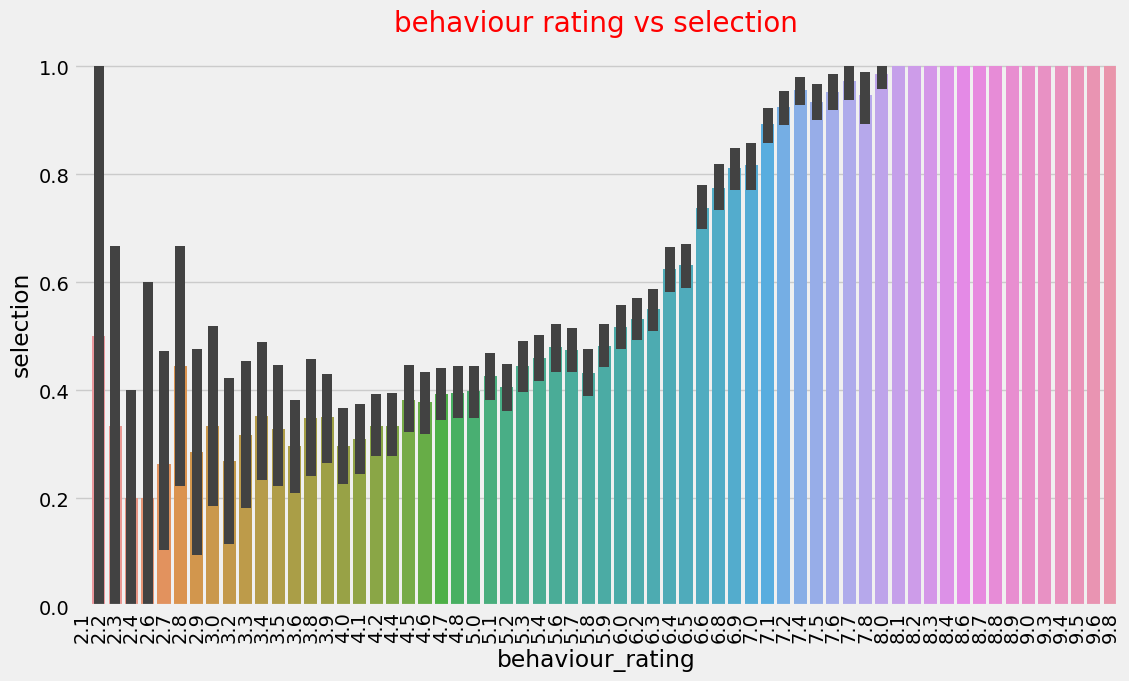

In [38]:
plt.figure(figsize=(12,7))
plt.title('behaviour rating vs selection',size=20,color='red')
plt.xticks(rotation=90)
sns.barplot(x='behaviour_rating',y='selection',data=data)
plt.show()

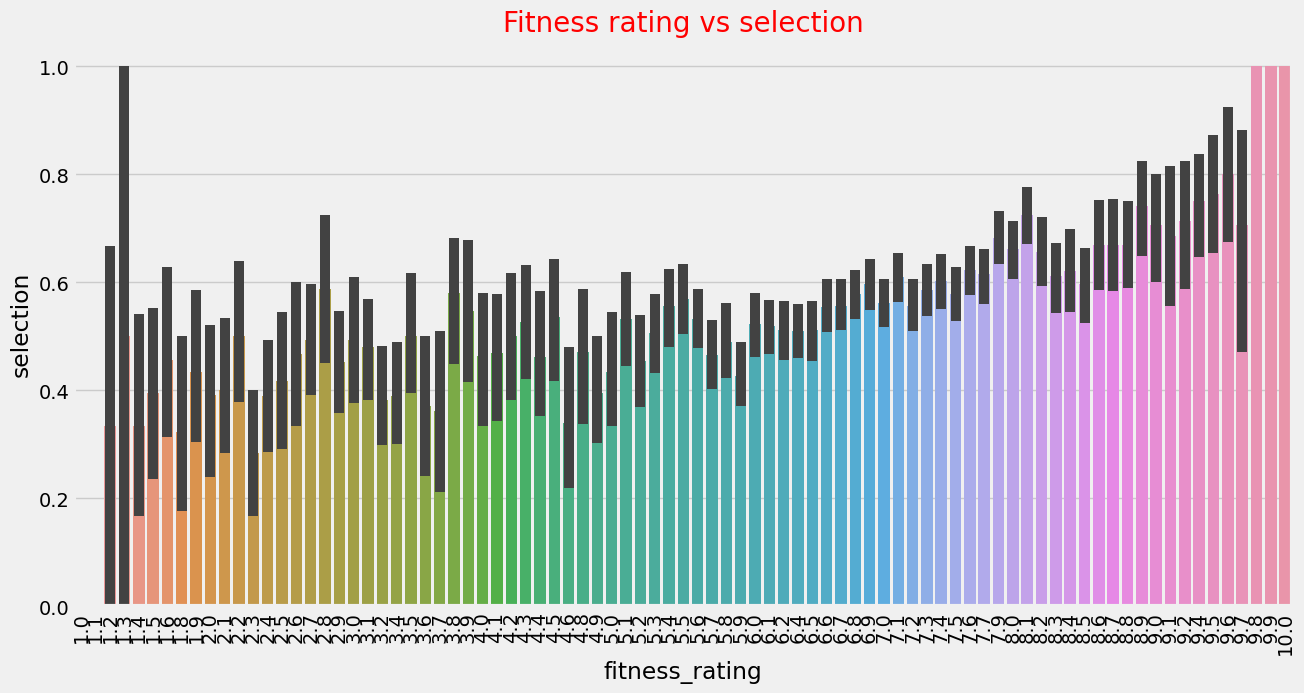

In [40]:
plt.figure(figsize=(14,7))
plt.title('Fitness rating vs selection',size=20,color='red')
plt.xticks(rotation=90)
sns.barplot(x='fitness_rating',y='selection',data=data)
plt.show()

<Axes: xlabel='gender', ylabel='count'>

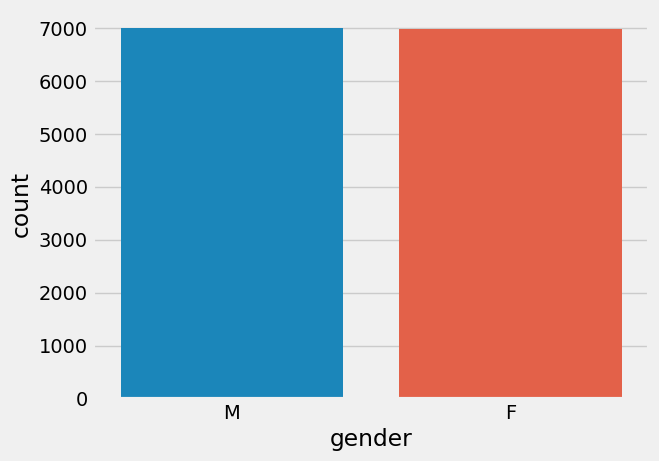

In [41]:
sns.countplot(x=data['gender'])

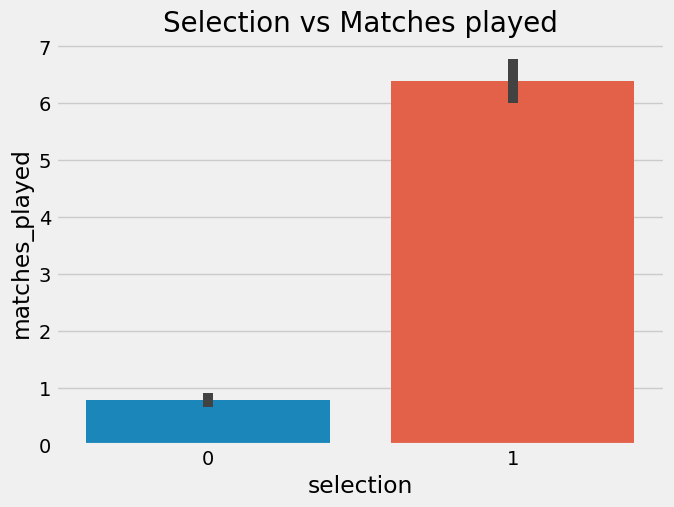

In [42]:
plt.figure(figsize=(7,5))
plt.title('Selection vs Matches played',size=20,color='black')
sns.barplot(x='selection',y='matches_played',data=data)
plt.show()

<ipython-input-44-1f1042813daf>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap='viridis')


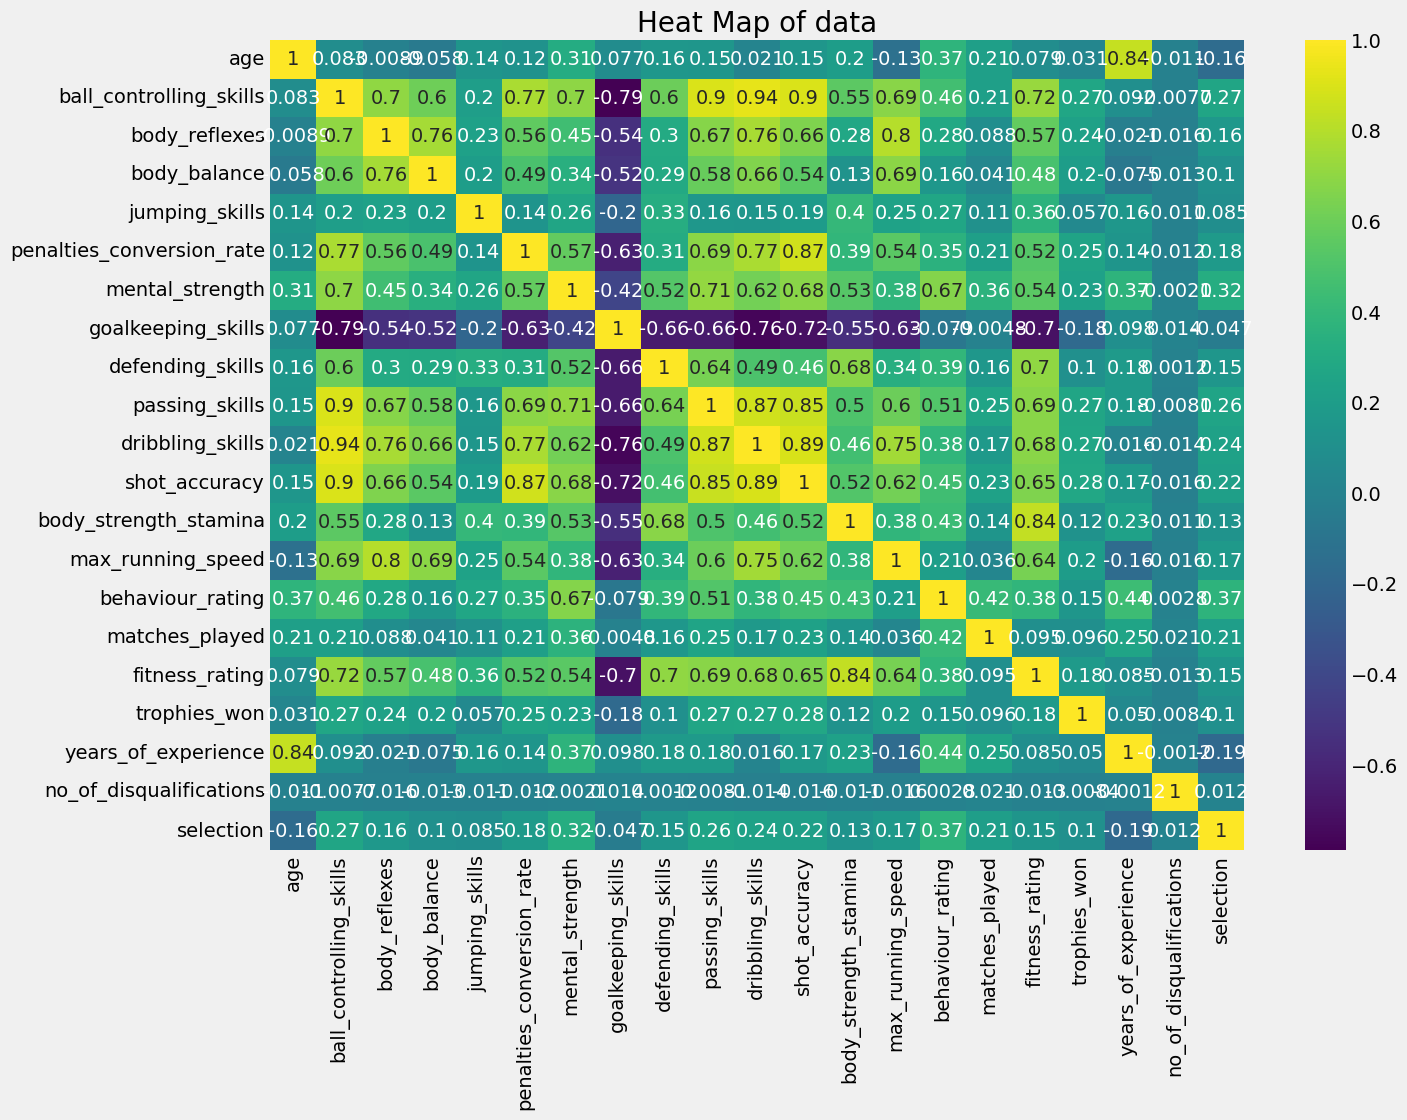

In [44]:
#Correlation between all variables in dataset
plt.figure(figsize=(14,10))
plt.title('Heat Map of data',size=20)
sns.heatmap(data.corr(),annot=True,cmap='viridis')
plt.show()

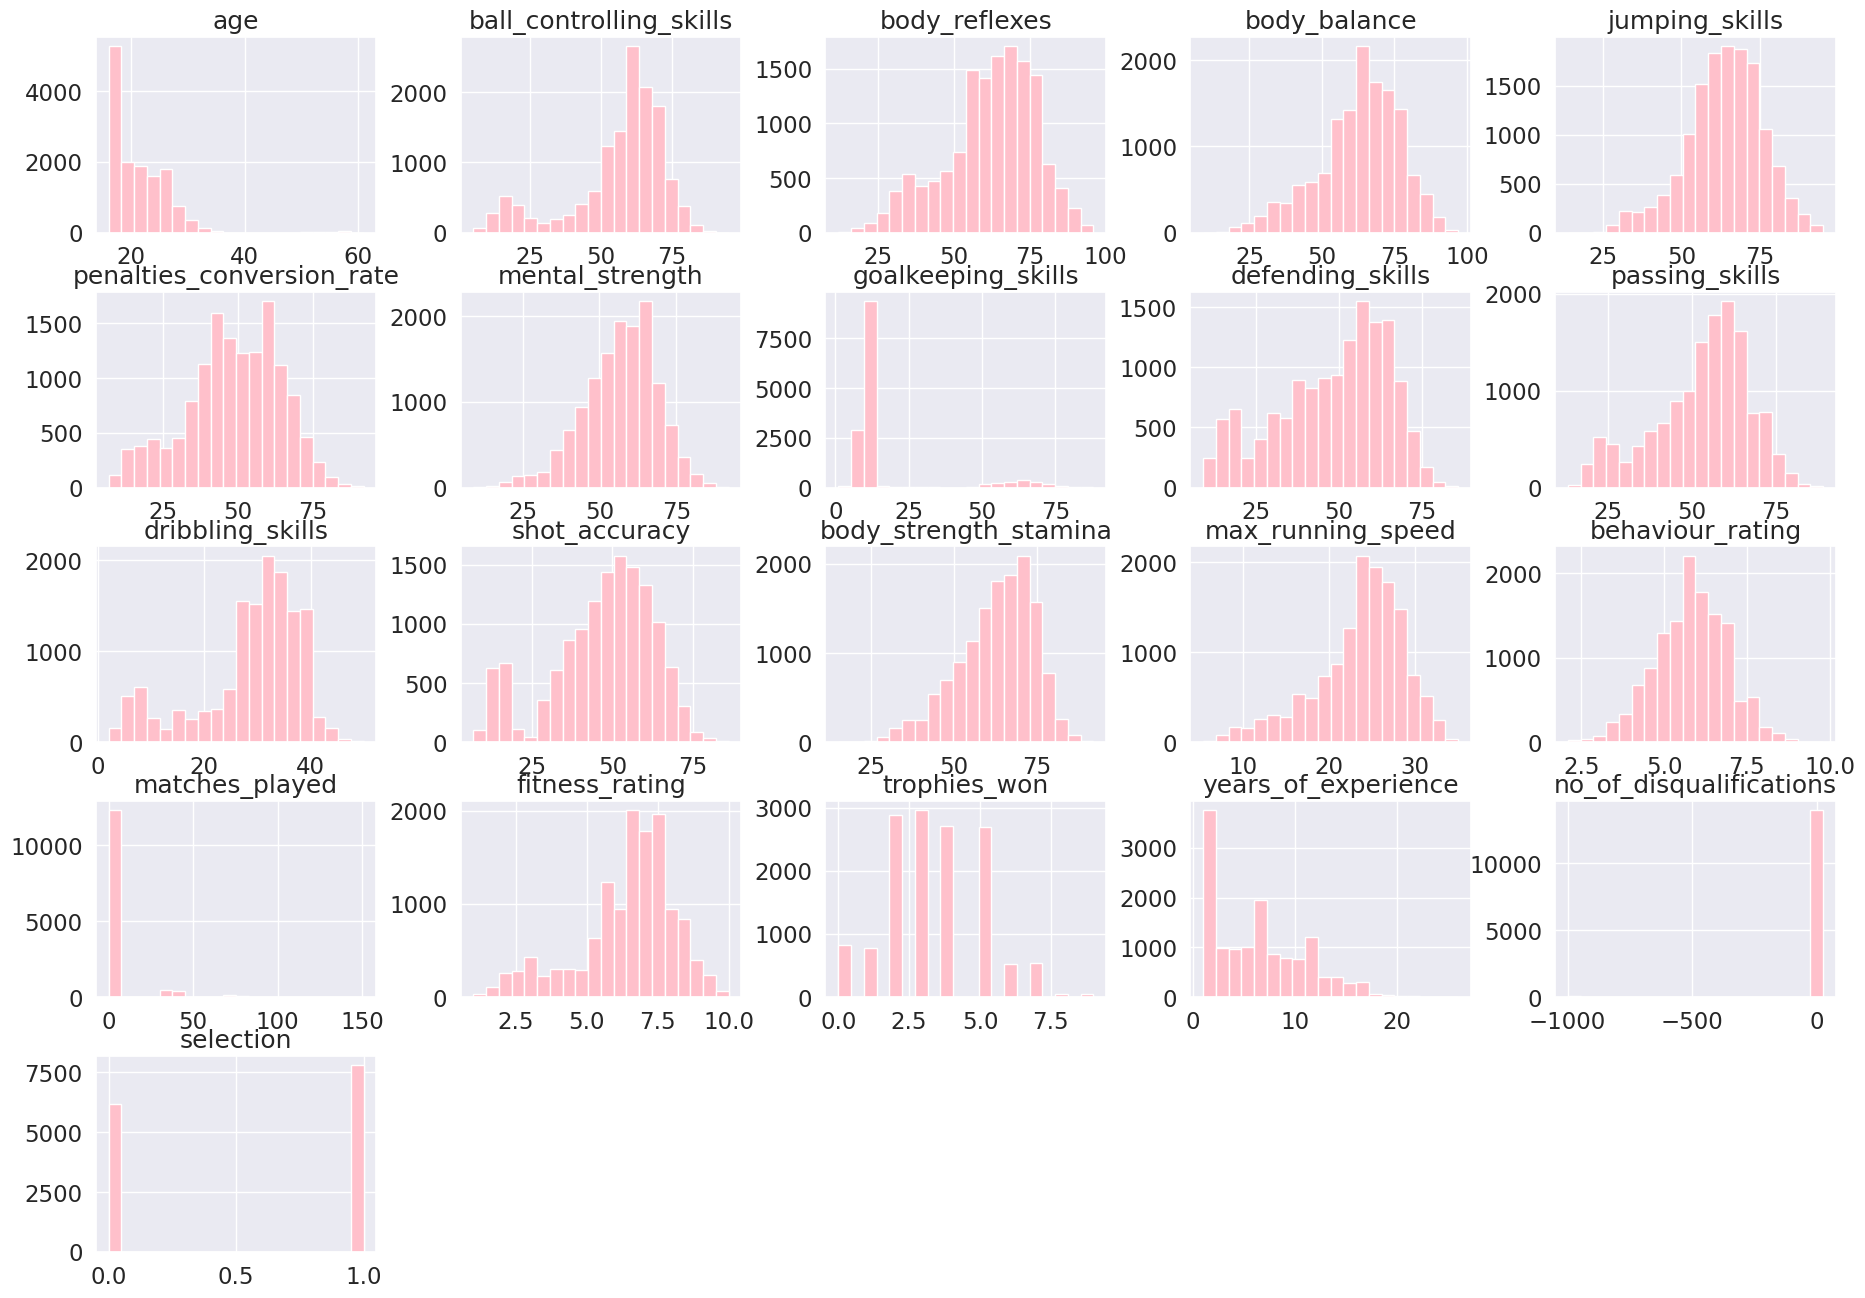

In [47]:
#Checking the distribution of each features
sns.set(style="darkgrid", font_scale=1.5, rc={'figure.figsize':(20,15)})
ax=data.hist(bins=20, color="Pink")

**DATA PRE-PROCESSING**

**MISSING VALUE HANDLING**

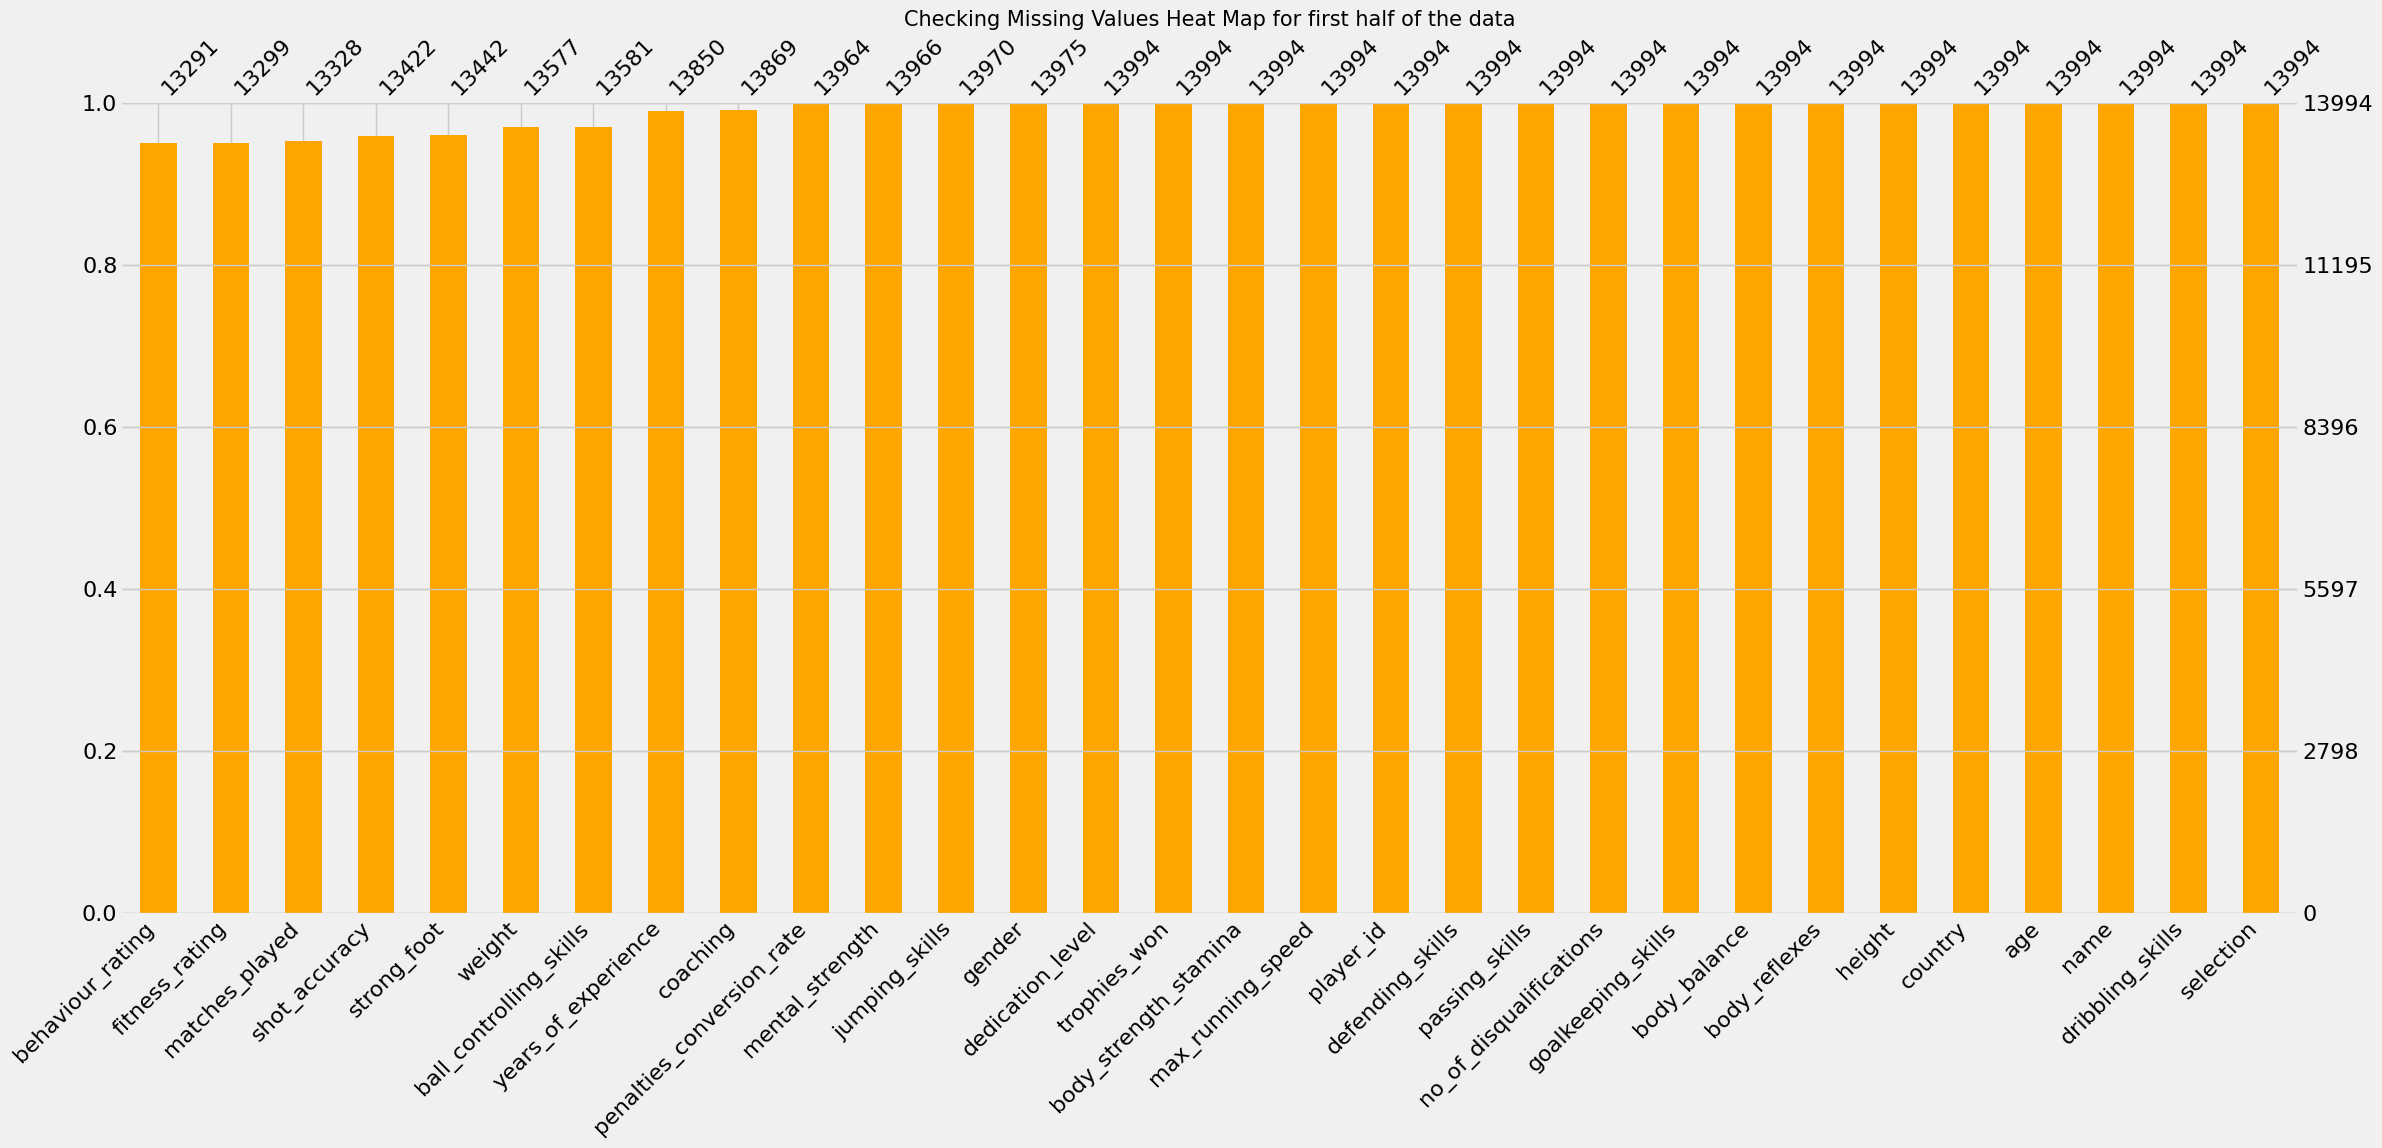

In [ ]:
#Cleaning Data
# checking if the data contains any NULL value
# Visualize missing values as a matrix
mno.bar(data.iloc[:, :40],
 color = 'orange',
 sort = 'ascending')
plt.title('Checking Missing Values Heat Map for first half of the data', fontsize =
15)
plt.show()




In [48]:
# Checking the missing values
data.isnull().sum()

player_id                      0
name                           0
age                            0
gender                        19
country                        0
height                         0
weight                       417
ball_controlling_skills      413
body_reflexes                  0
body_balance                   0
jumping_skills                24
penalties_conversion_rate     30
mental_strength               28
goalkeeping_skills             0
defending_skills               0
passing_skills                 0
dribbling_skills               0
shot_accuracy                572
body_strength_stamina          0
max_running_speed              0
strong_foot                  552
behaviour_rating             703
matches_played               666
fitness_rating               695
trophies_won                   0
dedication_level               0
coaching                     125
years_of_experience          144
no_of_disqualifications        0
selection                      0
dtype: int

In [49]:
data['coaching'] = data['coaching'].fillna(data['coaching'].mode()[0])
data['gender'] = data['gender'].fillna(data['gender'].mode()[0])
data['strong_foot'] = data['strong_foot'].fillna(data['strong_foot'].mode()[0])
data.isna().sum()

player_id                      0
name                           0
age                            0
gender                         0
country                        0
height                         0
weight                       417
ball_controlling_skills      413
body_reflexes                  0
body_balance                   0
jumping_skills                24
penalties_conversion_rate     30
mental_strength               28
goalkeeping_skills             0
defending_skills               0
passing_skills                 0
dribbling_skills               0
shot_accuracy                572
body_strength_stamina          0
max_running_speed              0
strong_foot                    0
behaviour_rating             703
matches_played               666
fitness_rating               695
trophies_won                   0
dedication_level               0
coaching                       0
years_of_experience          144
no_of_disqualifications        0
selection                      0
dtype: int

In [50]:
data['player_id'].nunique()

13994

In [51]:
data.name.nunique()

13994

player-id and name has 13994 unique values- So both the features can be dropped

In [52]:
data=data.drop(['player_id','name'],axis=1)

In [53]:
data['gender'].mode()

0    M
Name: gender, dtype: object

In [54]:
data['gender']=data['gender'].fillna('M')

<Axes: xlabel='weight', ylabel='count'>

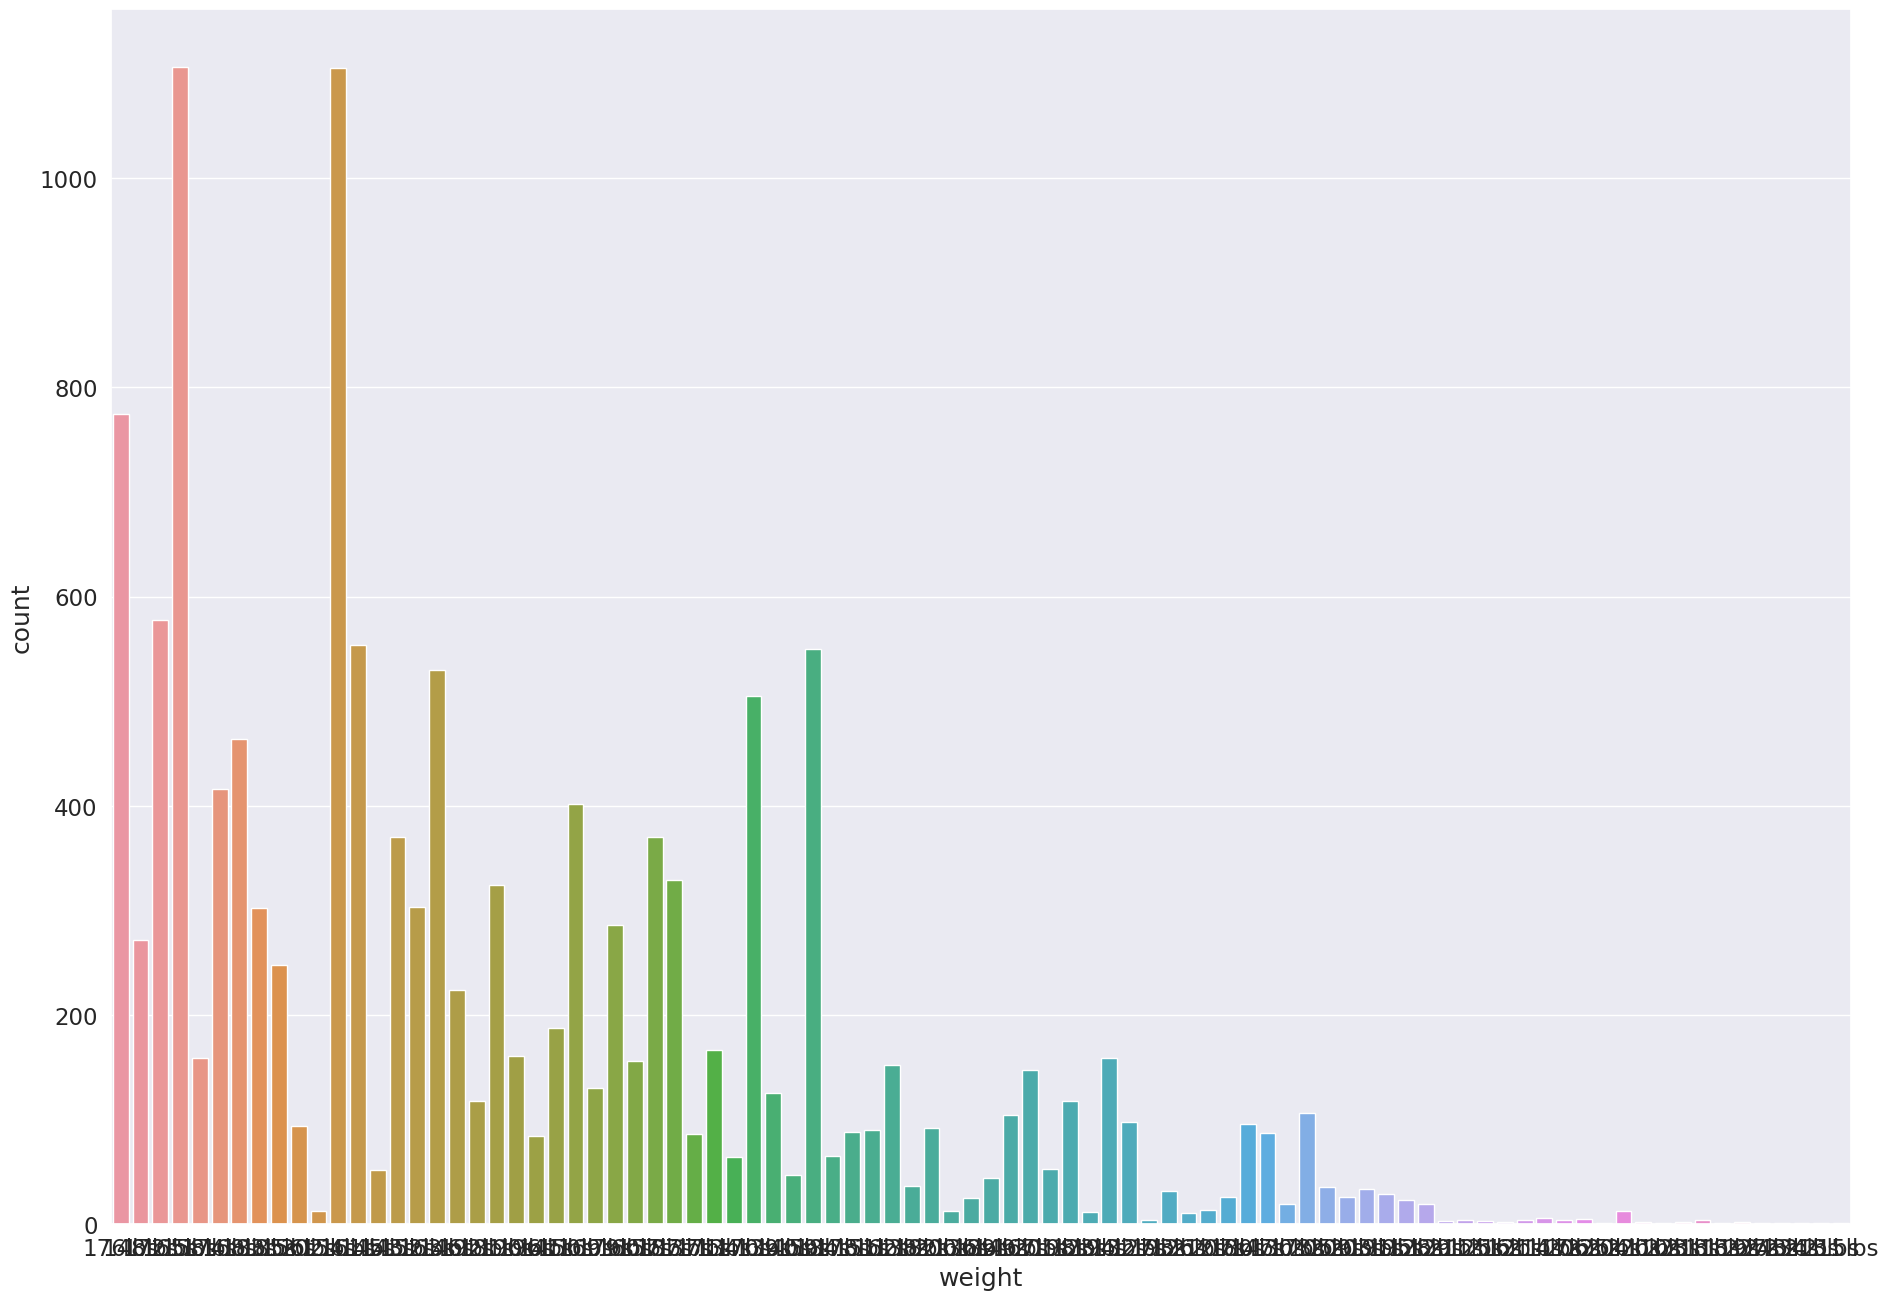

In [55]:
sns.countplot(x=data['weight'])

In [56]:
data['weight'].mode()

0    165lbs
Name: weight, dtype: object

In [58]:
data['weight'].nunique()


88

In [59]:
data['behaviour_rating'].nunique()

64

In [60]:
data['years_of_experience'].nunique()

25

In [61]:
data['matches_played'].nunique()

18

In [62]:
#Missing Values Imputation
# filling the missing value for the continous variables for proper data visualization
data['weight']=data['weight'].fillna('165lbs')
data['behaviour_rating'].fillna(data['behaviour_rating'].mean(), inplace = True)
data['fitness_rating'].fillna(data['fitness_rating'].mean(), inplace = True)
data['matches_played'].fillna(data['matches_played'].mean(), inplace = True)
data['shot_accuracy'].fillna(data['shot_accuracy'].mean(), inplace = True)
data['ball_controlling_skills'].fillna(data['ball_controlling_skills'].mean(), inplace = True)
data['years_of_experience'].fillna(data['years_of_experience'].mean(), inplace = True)
data['penalties_conversion_rate'].fillna(data['penalties_conversion_rate'].mean(), inplace =True)
data['mental_strength'].fillna(data['mental_strength'].mean(), inplace = True)
data['jumping_skills'].fillna(data['jumping_skills'].mean(), inplace = True)
data.isnull().sum()

age                          0
gender                       0
country                      0
height                       0
weight                       0
ball_controlling_skills      0
body_reflexes                0
body_balance                 0
jumping_skills               0
penalties_conversion_rate    0
mental_strength              0
goalkeeping_skills           0
defending_skills             0
passing_skills               0
dribbling_skills             0
shot_accuracy                0
body_strength_stamina        0
max_running_speed            0
strong_foot                  0
behaviour_rating             0
matches_played               0
fitness_rating               0
trophies_won                 0
dedication_level             0
coaching                     0
years_of_experience          0
no_of_disqualifications      0
selection                    0
dtype: int64

In [63]:
# lets check whether the data still has any missing values
data.isnull().sum().sum()

0

In [66]:
data['weight'] = data['weight'].str.extract('(\d+)').astype(int) #changing the datatype of weight feature

In [69]:
data.weight

0        176
1        148
2        172
3        165
4        158
        ... 
13989    161
13990    165
13991    172
13992    150
13993    159
Name: weight, Length: 13907, dtype: int64

<Axes: >

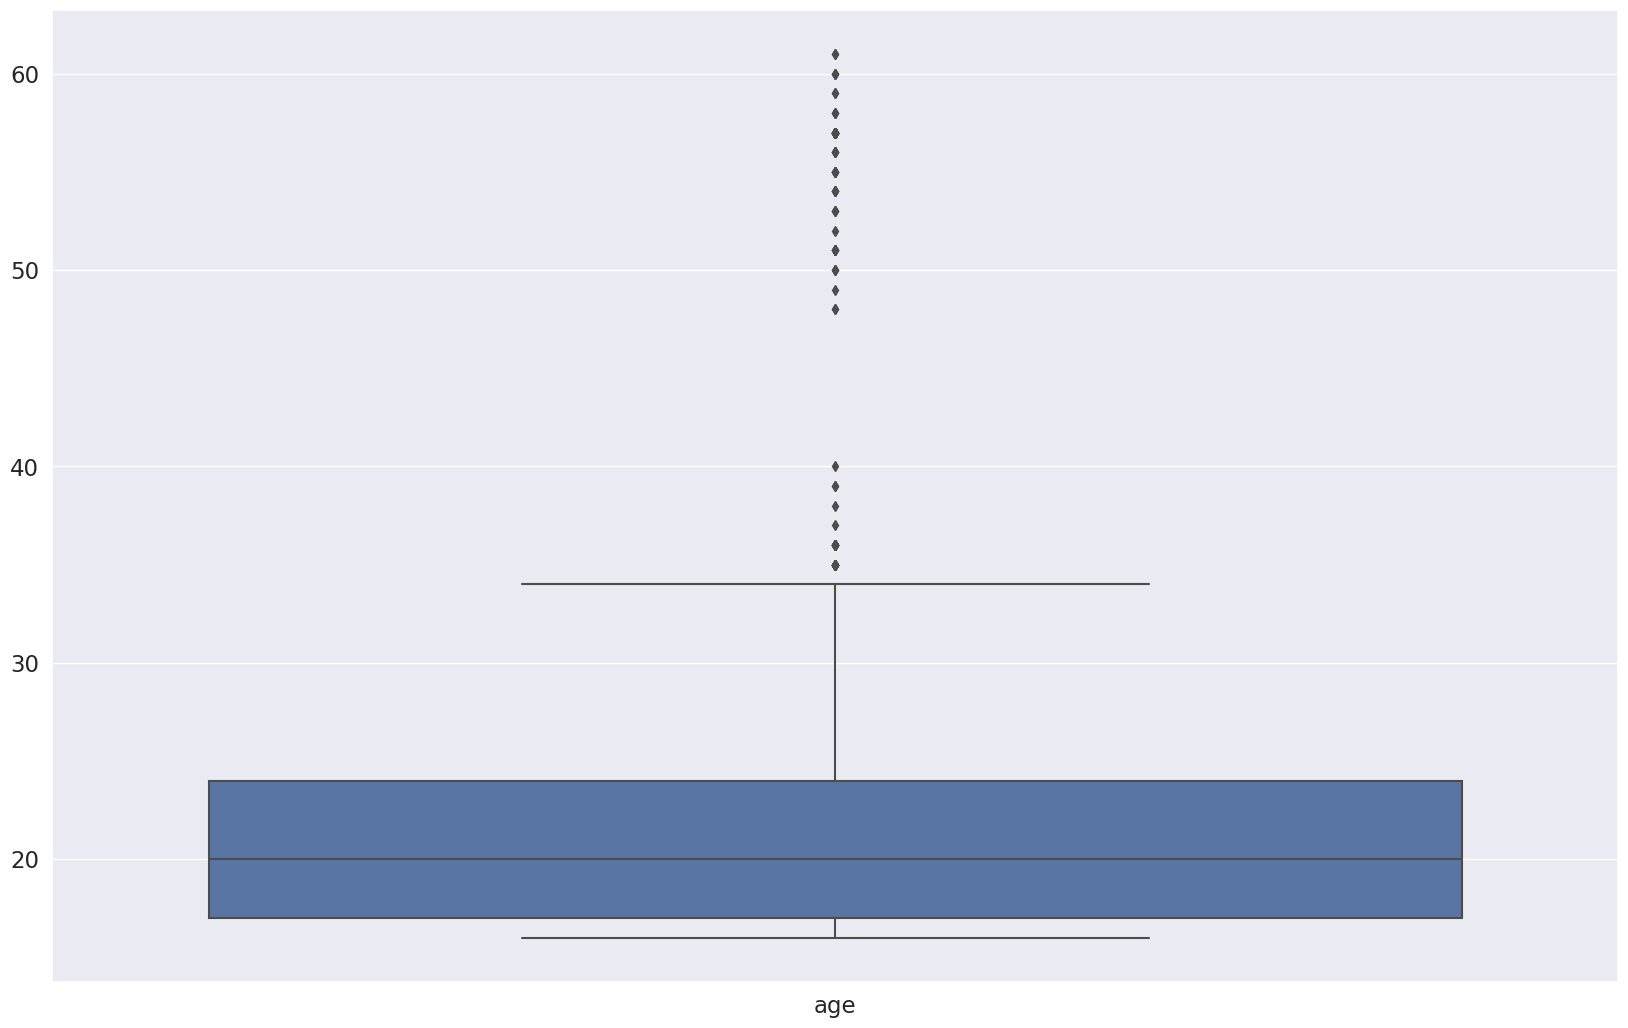

In [67]:
sns.boxplot(data[['age']]) #handling outliers in age column

In [68]:
data=data[data.age<=38]

In [70]:
#importing library to encode
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [71]:
data.dtypes

age                            int64
gender                        object
country                       object
height                        object
weight                         int64
ball_controlling_skills      float64
body_reflexes                float64
body_balance                 float64
jumping_skills               float64
penalties_conversion_rate    float64
mental_strength              float64
goalkeeping_skills           float64
defending_skills             float64
passing_skills               float64
dribbling_skills             float64
shot_accuracy                float64
body_strength_stamina        float64
max_running_speed            float64
strong_foot                   object
behaviour_rating             float64
matches_played               float64
fitness_rating               float64
trophies_won                 float64
dedication_level              object
coaching                      object
years_of_experience          float64
no_of_disqualifications      float64
s

In [72]:
#Forming a list of objects to be label encoded
objList = data.select_dtypes(include = "object").columns
print (objList)

Index(['gender', 'country', 'height', 'strong_foot', 'dedication_level',
       'coaching'],
      dtype='object')


In [73]:
#Using label encoder to encode those list
data[objList] = data[objList].apply(le.fit_transform)

In [74]:
data.head()

,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,23,1,153,18,176,77.0,58.0,47.0,59.0,41.0,...,3,7.700000,3.908463,8.100000,2.0,0,2,8.0,0.0,1
1,18,1,124,5,148,54.0,69.0,70.0,62.0,53.0,...,0,5.300000,0.000000,6.405482,3.0,2,1,3.0,0.0,0
2,16,0,135,18,172,34.0,43.0,45.0,69.0,49.0,...,1,4.700000,0.000000,6.600000,5.0,1,0,2.0,0.0,1
3,27,1,28,6,165,79.0,73.0,76.0,86.0,81.0,...,3,8.600000,113.000000,8.600000,6.0,2,0,13.0,16.0,1
4,19,0,5,13,158,47.0,61.0,74.0,57.0,49.0,...,3,5.822068,0.000000,5.700000,5.0,2,0,4.0,0.0,0


In [75]:
data.dtypes

age                            int64
gender                         int64
country                        int64
height                         int64
weight                         int64
ball_controlling_skills      float64
body_reflexes                float64
body_balance                 float64
jumping_skills               float64
penalties_conversion_rate    float64
mental_strength              float64
goalkeeping_skills           float64
defending_skills             float64
passing_skills               float64
dribbling_skills             float64
shot_accuracy                float64
body_strength_stamina        float64
max_running_speed            float64
strong_foot                    int64
behaviour_rating             float64
matches_played               float64
fitness_rating               float64
trophies_won                 float64
dedication_level               int64
coaching                       int64
years_of_experience          float64
no_of_disqualifications      float64
s

In [76]:
data['years_of_experience'].unique()

array([ 8.        ,  3.        ,  2.        , 13.        ,  4.        ,
        7.        , 10.        ,  6.        , 11.        , 15.        ,
        5.        ,  1.        , 12.        ,  9.        , 14.        ,
       18.        , 16.        , 21.        , 20.        ,  6.43415162,
       17.        , 19.        , 22.        , 24.        ])

In [78]:
data['no_of_disqualifications'].unique()

array([   0.,   16.,    4.,    6.,    5.,    8., -999.,    9.,   12.,
         18.,   10.,   14.,   24.,   15.,   25.,   13.,   21.])

In [79]:
data['no_of_disqualifications'].mean()

-4.627813331415834

In [80]:
data[data['no_of_disqualifications']==-999.]

,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
57,21,1,12,5,163,62.000000,70.0,71.0,74.0,43.0,...,3,5.7,0.0,5.9,3.0,0,0,7.0,-999.0,0
497,16,1,39,14,143,54.000000,86.0,77.0,45.0,64.0,...,2,3.3,0.0,6.0,4.0,2,0,2.0,-999.0,1
725,24,0,29,16,181,51.000000,63.0,62.0,69.0,55.0,...,0,6.2,0.0,7.3,6.0,0,1,9.0,-999.0,0
939,23,0,129,18,187,20.000000,37.0,40.0,63.0,20.0,...,3,5.7,0.0,2.3,1.0,2,0,9.0,-999.0,0
1008,16,1,119,6,154,56.043958,83.0,77.0,79.0,53.0,...,3,6.9,0.0,7.5,5.0,0,1,1.0,-999.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12852,20,1,155,15,157,65.000000,74.0,63.0,71.0,40.0,...,2,6.5,0.0,8.3,5.0,0,0,6.0,-999.0,0
12934,16,1,12,5,141,66.000000,71.0,69.0,53.0,67.0,...,1,5.0,0.0,4.1,7.0,2,0,2.0,-999.0,1
13111,31,0,97,13,148,62.000000,65.0,63.0,67.0,65.0,...,2,6.4,1.0,6.9,5.0,2,3,16.0,-999.0,0
13346,30,1,122,6,176,70.000000,67.0,64.0,69.0,65.0,...,2,6.8,37.0,6.2,2.0,2,2,15.0,-999.0,1


In [81]:
data['no_of_disqualifications'] = data['no_of_disqualifications'].replace([-999.], 0)

In [82]:
data['no_of_disqualifications'].unique()

array([ 0., 16.,  4.,  6.,  5.,  8.,  9., 12., 18., 10., 14., 24., 15.,
       25., 13., 21.])

In [83]:
#To get unique value counts of all features in a glance
data_unique=pd.DataFrame(data.nunique())
data_unique

,0
age,23
gender,2
country,163
height,31
weight,88
ball_controlling_skills,90
body_reflexes,84
body_balance,86
jumping_skills,75
penalties_conversion_rate,87


<ipython-input-64-1c973b77d454>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['defending_skills'], color = 'red')


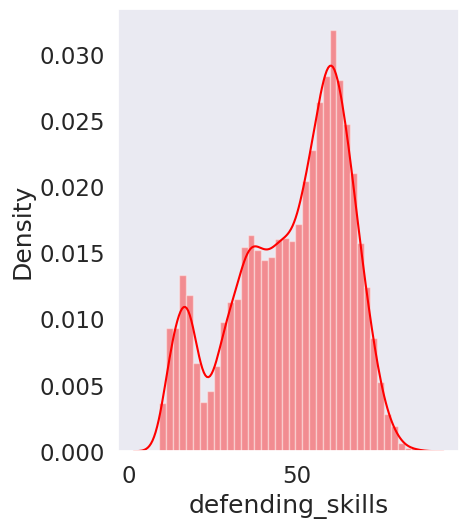

In [64]:
# lets check the Distribution of Scores of Different Skills
plt.rcParams['figure.figsize'] = (18, 12)
plt.subplot(2, 4, 1)
sns.distplot(data['defending_skills'], color = 'red')
plt.grid()


<Axes: >

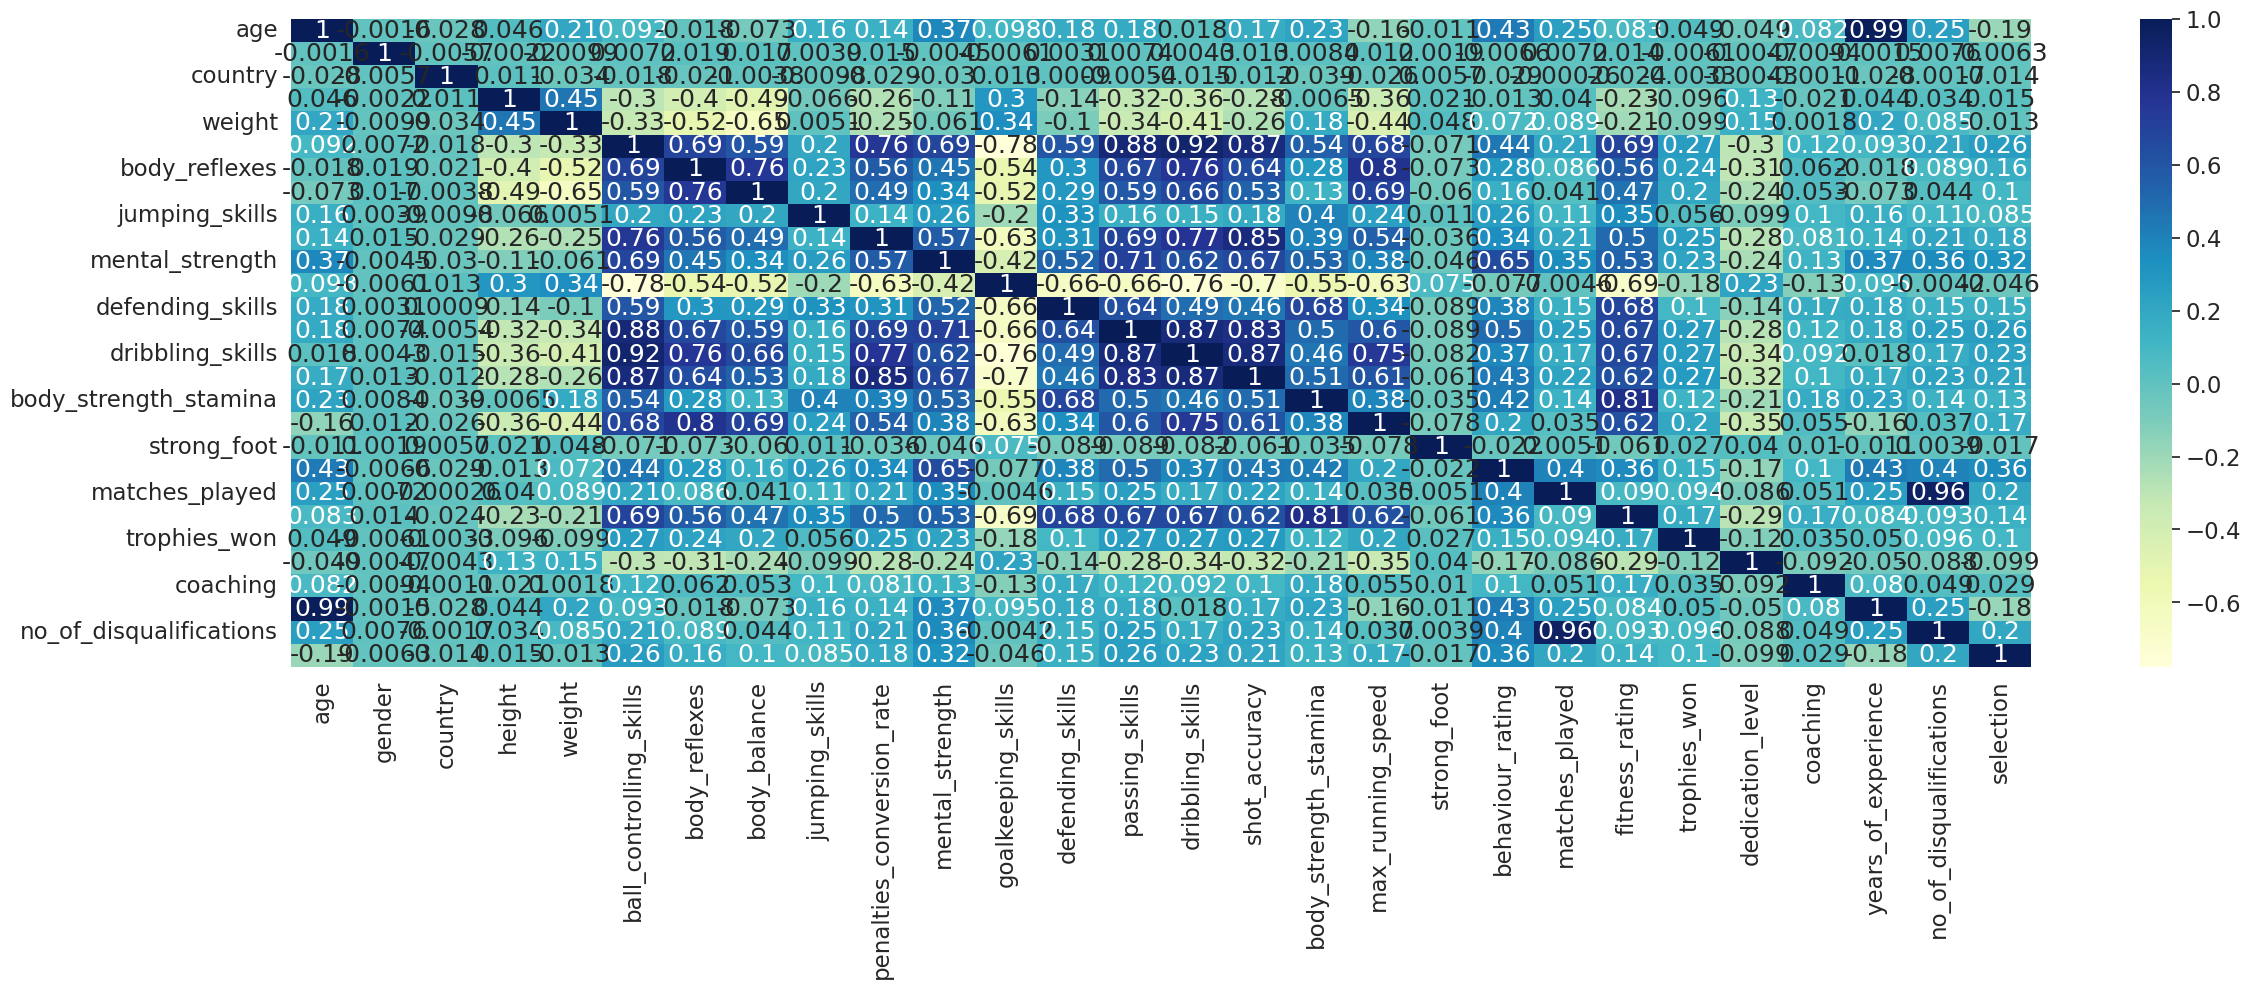

In [85]:
plt.figure(figsize=(25,8))
corr_matrix=data.corr()
sns.heatmap(corr_matrix,annot=True,cmap='YlGnBu')

In [ ]:
#Feature Scaling

In [86]:
x=data.drop('selection',axis=1)

In [87]:
y=data['selection']

In [88]:
from sklearn.preprocessing import MinMaxScaler

In [89]:
minmax=MinMaxScaler()

In [90]:
x=minmax.fit_transform(x)

In [91]:
x=pd.DataFrame(x)

In [92]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)

In [ ]:
#Logistic Regression

In [94]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='newton-cg', class_weight='balanced')
lr_clf=lr.fit(x_train,y_train)

In [95]:
y_predictions=lr_clf.predict(x_test)

In [96]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix

In [97]:
print('Accuracy=',accuracy_score(y_test,y_predictions))
print('Precision=',precision_score(y_test,y_predictions,average='weighted'))
print('recall_score=',recall_score(y_test,y_predictions,average='weighted'))
print('f1_score=',f1_score(y_test,y_predictions,average='weighted'))

Accuracy= 0.790079079798706
Precision= 0.7913173243164767
recall_score= 0.790079079798706
f1_score= 0.7904003472288424


In [98]:
confusion_matrix(y_test,y_predictions)

array([[ 990,  265],
       [ 319, 1208]])

In [99]:
from sklearn.model_selection import KFold
Kfold_validator=KFold(5)

In [100]:
from sklearn.model_selection import KFold
Kfold_validator=KFold(5)

In [101]:
from sklearn.model_selection import cross_val_score
cv_result=cross_val_score(lr_clf,x,y,cv=Kfold_validator)
cv_result

array([0.77246585, 0.79007908, 0.77166487, 0.78101402, 0.79072276])

In [102]:
np.mean(cv_result)

0.7811893171570151

In [103]:
np.mean(cv_result)

0.7811893171570151

In [104]:
from sklearn.neighbors import KNeighborsClassifier

In [105]:
metric_k=[]
neighbors=np.arange(3,15)

In [106]:
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    classifier.fit(x_train,y_train)
    y_predictions=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_predictions)
    metric_k.append(acc)

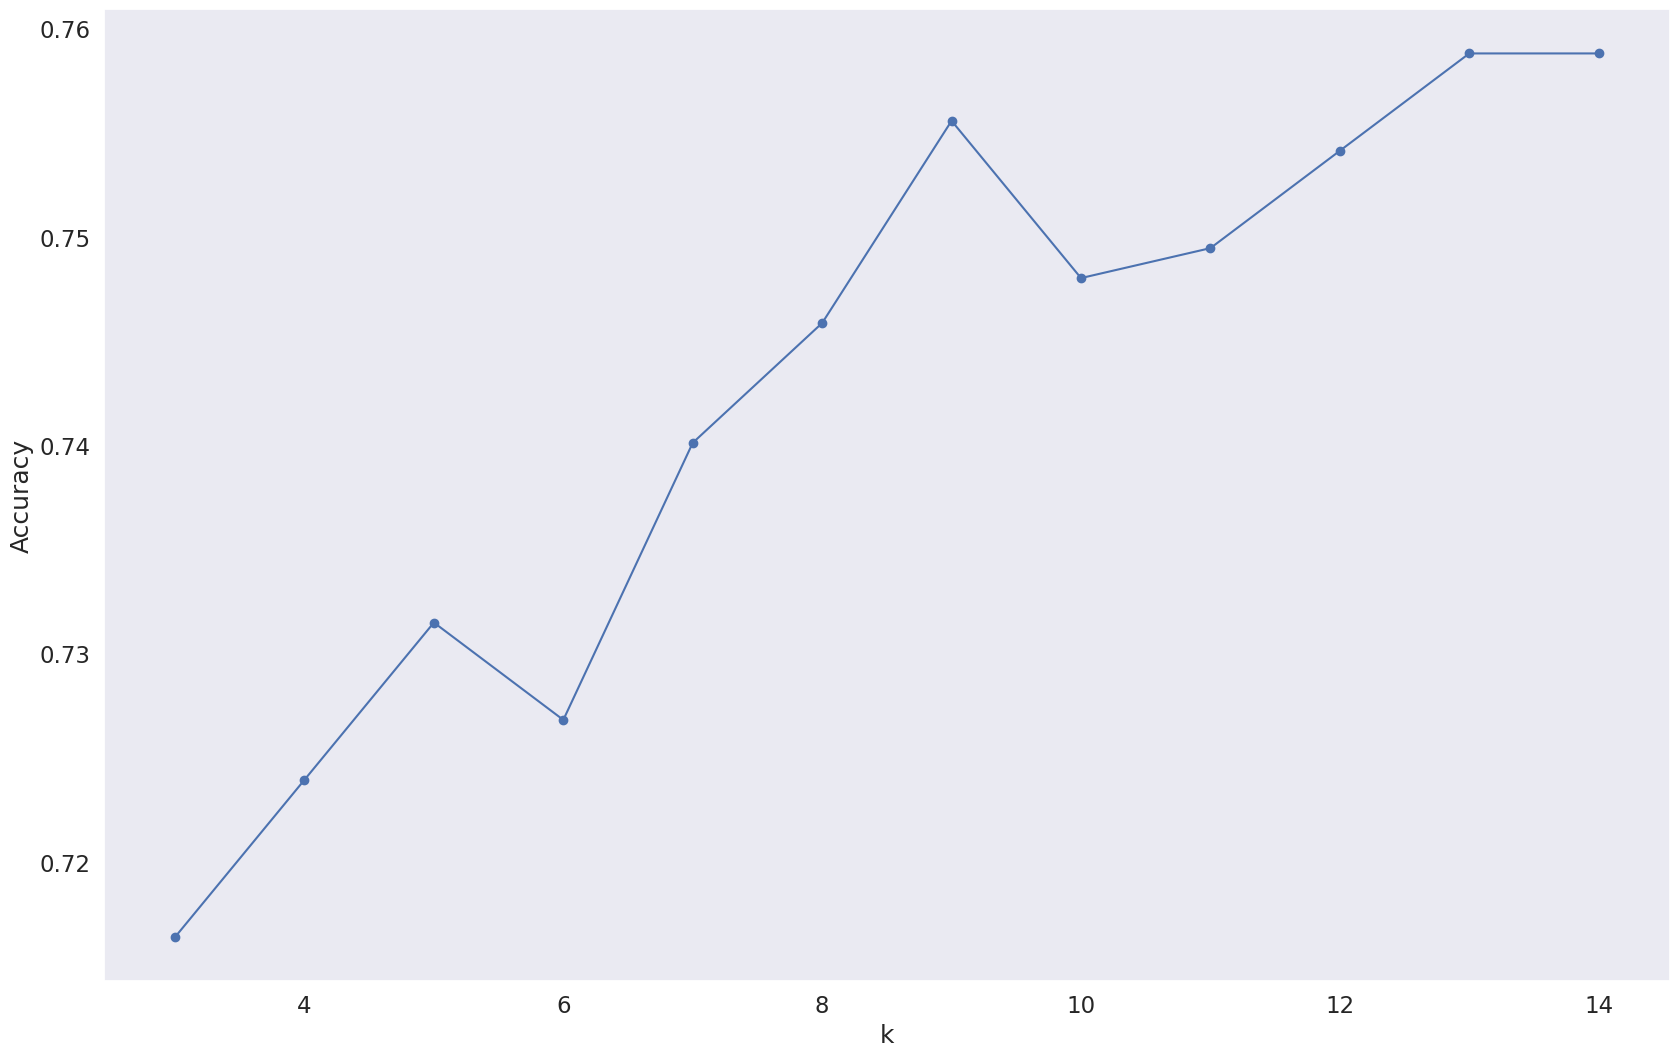

In [107]:
plt.plot(neighbors,metric_k,'o-')
plt.ylabel('Accuracy')
plt.xlabel('k')
plt.grid()

In [108]:
classifier=KNeighborsClassifier(n_neighbors=8,metric='euclidean')
classifier.fit(x_train,y_train)
y_predictions=classifier.predict(x_test)

In [109]:
print('Accuracy=',accuracy_score(y_test,y_predictions))
print('Precision=',precision_score(y_test,y_predictions,average='weighted'))
print('recall_score=',recall_score(y_test,y_predictions,average='weighted'))
print('f1_score=',f1_score(y_test,y_predictions,average='weighted'))
confusion_matrix(y_test,y_predictions)

Accuracy= 0.7458662832494608
Precision= 0.7544707279849528
recall_score= 0.7458662832494608
f1_score= 0.7463436180597719


array([[1001,  254],
       [ 453, 1074]])

In [110]:
cv_result=cross_val_score(classifier,x,y,cv=Kfold_validator)
cv_result

array([0.74694464, 0.74083393, 0.73247033, 0.72527868, 0.73714491])

In [111]:
np.mean(cv_result)

0.7365344999225772

In [112]:
#SVM

In [113]:
from sklearn.svm import SVC
svmclf=SVC(kernel='linear',class_weight='balanced')
svmclf.fit(x_train,y_train)

SVC(class_weight='balanced', kernel='linear')

In [114]:
print('Accuracy=',accuracy_score(y_test,y_predictions))
print('Precision=',precision_score(y_test,y_predictions,average='weighted'))
print('recall_score=',recall_score(y_test,y_predictions,average='weighted'))
print('f1_score=',f1_score(y_test,y_predictions,average='weighted'))
confusion_matrix(y_test,y_predictions)

Accuracy= 0.7458662832494608
Precision= 0.7544707279849528
recall_score= 0.7458662832494608
f1_score= 0.7463436180597719


array([[1001,  254],
       [ 453, 1074]])

In [115]:
cv_result=cross_val_score(svmclf,x,y,cv=Kfold_validator)
cv_result

array([0.7721064 , 0.79007908, 0.77705861, 0.7856886 , 0.78748652])

In [116]:
np.mean(cv_result)

0.7824838413895667

In [118]:
#Random Forest

In [119]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(class_weight='balanced')
rf_clf.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced')

In [120]:
y_predictions=rf_clf.predict(x_test)

In [121]:
print('Accuracy=',accuracy_score(y_test,y_predictions))
print('Precision=',precision_score(y_test,y_predictions,average='weighted'))
print('recall_score=',recall_score(y_test,y_predictions,average='weighted'))
print('f1_score=',f1_score(y_test,y_predictions,average='weighted'))
confusion_matrix(y_test,y_predictions)

Accuracy= 0.8594536304816679
Precision= 0.8593987552511909
recall_score= 0.8594536304816679
f1_score= 0.8591777366475454


array([[1036,  219],
       [ 172, 1355]])

In [122]:
cv_result=cross_val_score(rf_clf,x,y,cv=Kfold_validator)
cv_result

array([0.85046729, 0.856578  , 0.85616685, 0.85616685, 0.86048184])

In [123]:
np.mean(cv_result)

0.8559721650276046

In [124]:
cm=confusion_matrix(y_test,y_predictions)

Text(102.24999999999999, 0.5, 'True')

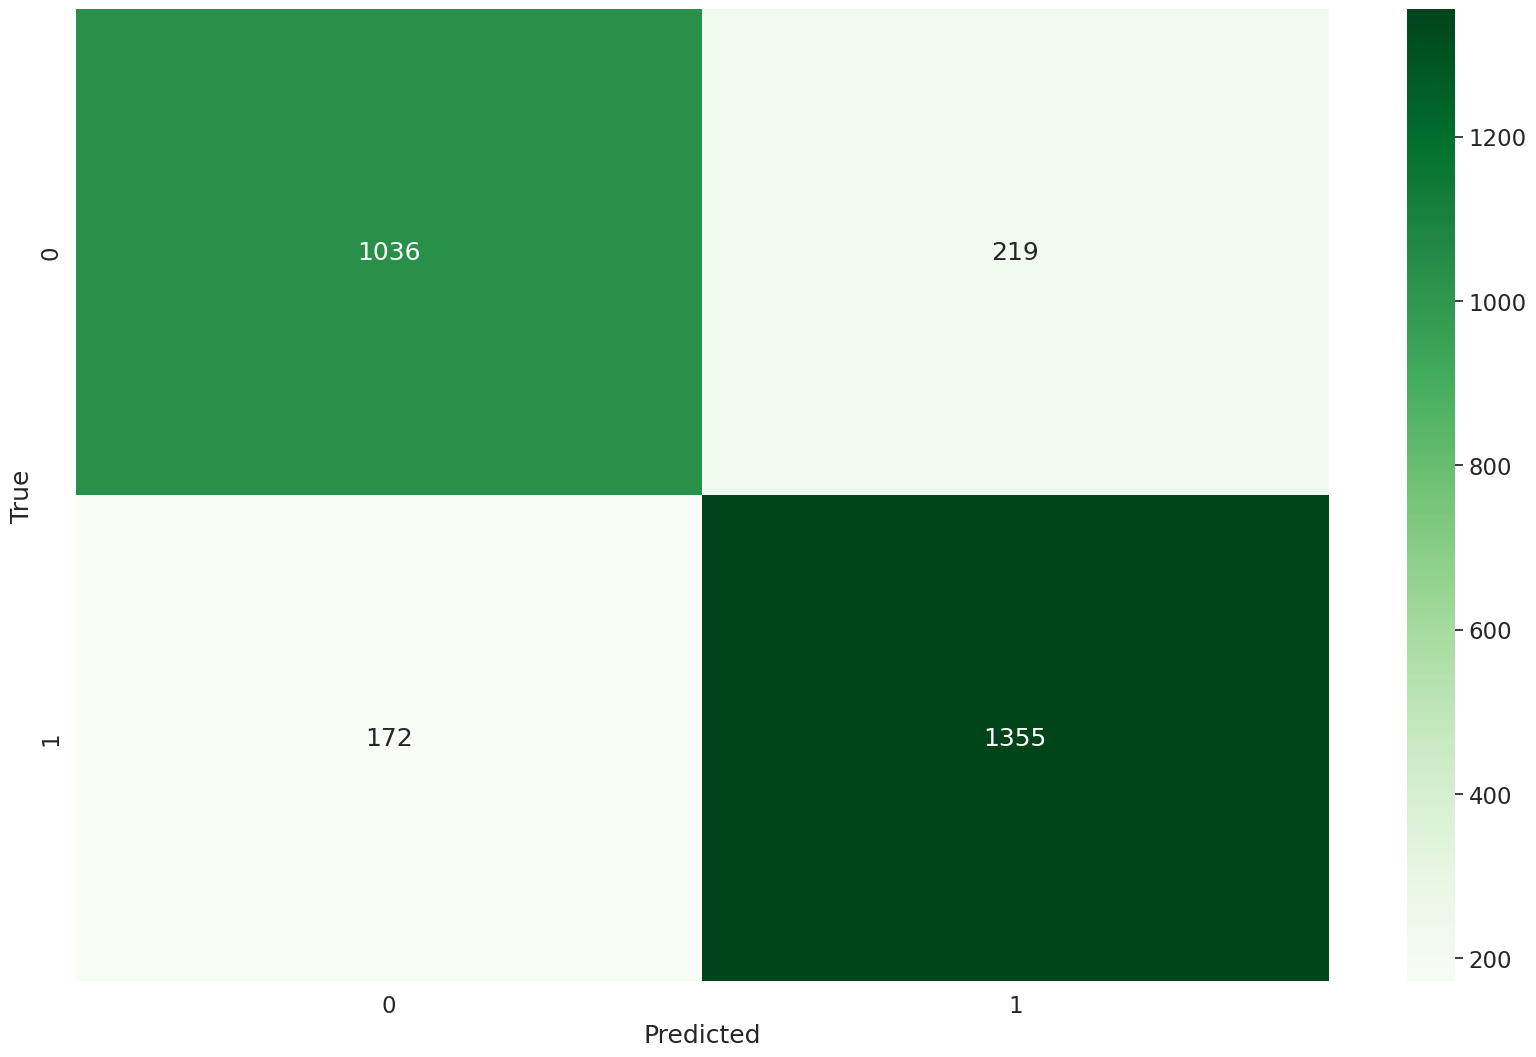

In [125]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
#XGBoost

In [126]:
from xgboost import XGBClassifier

In [127]:
xgb=XGBClassifier()

In [128]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [129]:
y_predictions=xgb.predict(x_test)

In [130]:
print('Accuracy=',accuracy_score(y_test,y_predictions))
print('Precision=',precision_score(y_test,y_predictions,average='weighted'))
print('recall_score=',recall_score(y_test,y_predictions,average='weighted'))
print('f1_score=',f1_score(y_test,y_predictions,average='weighted'))
confusion_matrix(y_test,y_predictions)

Accuracy= 0.8608914450035945
Precision= 0.8607635543533947
recall_score= 0.8608914450035945
f1_score= 0.8607681060073202


array([[1050,  205],
       [ 182, 1345]])

In [131]:
cv_result=cross_val_score(xgb,x,y,cv=Kfold_validator)
cv_result

array([0.85585909, 0.86017254, 0.86156059, 0.85760518, 0.86084142])

In [132]:
np.mean(cv_result)

0.8592077647154319

### So by evaluvating the models the train dataset, have the best model is XGBoost and Random Forest
